## 4. Fitting and Validating the Generated Templates in the Slitless Mode


The template library was generated for a different stellar populations in Notebook 3. The aim of this notebook is to see if we can narrow down on the correct population-distribution, when given a sample-data image.

The notebook is divided into the following sections:
1. Defining Input Parameters
2. Building a data matrix
3. Find the best-fitting distribution, and hence, the best-fitting template


Script written by: **Soumya Shreeram** <br/> 
Project supervised by: **Nadine Neumayer and Francisco Nogueras-Lara (MPIA)** <br/>
Date: **16th October 2020** <br/>

In [1]:
import astropy.units as u
import astropy.io.fits as fits

from scipy.sparse import csr_matrix
import scipy.stats as stats
import numpy as np
import os
import importlib

# generate random integer values
from random import seed
from random import randint

# plotting imports
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm

# to show progress during computations
from time import sleep
import sys

import matplotlib
import seaborn as sns

# for manupilating spectra
from specutils.manipulation import (box_smooth, gaussian_smooth, trapezoid_smooth)
from specutils import Spectrum1D

# for doing combinatorics with spectra
from itertools import permutations

In [2]:
%matplotlib inline
font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)

In [3]:
sys.path.append('imported_files/')
import Simulating_Spectra as ss
import plotting as pt
import Slitless_spec_forward_modelling as ssfm
import Fitting_and_pdfs as fap

#### 1. Defining Input Parameters

In [19]:
num_stars = 10
l_pix, u_pix = 0, 2000
generate_new_pos = False
x_pos, y_pos = ss.starPositions(l_pix, u_pix, num_stars, generate_new_pos,\
                             'Data/pos_arr.npy')

template_dir = 'Data/Template_library_%d_stars/'%num_stars
hot_stars = 0.1
templates_exist= False

# wavelength to pixel conversions
delta_lambda = 0.0005  # micro meter ==  1 pixel
k_band_lambda0 = 2.2
k_band_range = 0.3 # micro meter

# corresponsing resolution and dispersion size
r = k_band_lambda0/delta_lambda
disperse_range = int(k_band_range/delta_lambda) 
print('The spectra is dispersed over %d pixels'%disperse_range)

dispersion_angle = 0 # degrees

# number to which the dimensions of the original image is reduced to cal chi-squared
num_splits = int(u_pix/5)

# different populations of hot stars considered 
hot_stars_arr = np.arange(1, 7)/10

The spectra is dispersed over 600 pixels


#### 2. Building a data matrix

1 stars at Teff = 12000 K, log g = 6.0
0 stars at Teff = 11800 K, log g = 2.5
0 stars at Teff = 10000 K, log g = 3.0
0 stars at Teff = 8400 K, log g = 6.0
0 stars at Teff = 7600 K, log g = 3.5
0 stars at Teff = 6900 K, log g = 3.0
0 stars at Teff = 5900 K, log g = 3.0
9 stars at Teff = 5100 K, log g = 2.0
0 stars at Teff = 4700 K, log g = 1.5
0 stars at Teff = 3900 K, log g = 6.0

Choosing permutation no. 3 out of total 10 permutations


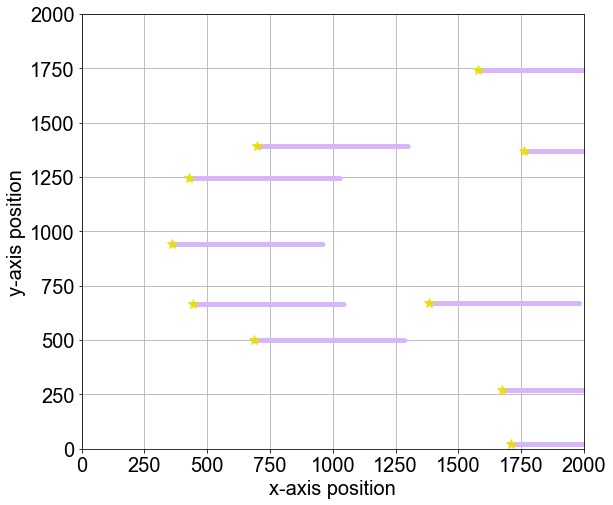

In [31]:
data_LSF_2Dmat, perm_no = fap.dataMatrix(template_dir, hot_stars, num_stars, u_pix, \
                                         l_pix, x_pos, y_pos, disperse_range, \
                                         dispersion_angle, templates_exist)

#### 3. Find the best-fitting distribution, and hence, the best-fitting template

In [ ]:
importlib.reload(fap)
chi_square3D = fap.fitTemplateLibrary(template_dir, hot_stars_arr, num_stars,\
                                      data_LSF_2Dmat, num_splits, u_pix)



For 1 hot stars:

The best-fitting permutation is 3 with chi-squared = 365933.00


For 2 hot stars:

The best-fitting permutation is 29 with chi-squared = 380383.00


For 3 hot stars:

The best-fitting permutation is 110 with chi-squared = 391188.00


For 4 hot stars:

